# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [1]:
# Your import 
import pandas as pd

# Load the Pokémon dataset
pokemon_data =  pd.read_csv("pokemon.csv")# Your code

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [3]:
# Create a derived feature: sp_attack_to_sp_defense_ratio


# your code
pokemon_data["sp_attack_to_sp_defense_ratio"] = pokemon_data["sp_attack"] / pokemon_data["sp_defense"]

# Select all features + derived  
# target: Legendary 
# Your code
features = ["attack", "defense", 'sp_attack', 'sp_defense', 'speed', 'total_bs',
            'capture_rt', 'sp_attack_to_sp_defense_ratio', 'type']
target = "legendary"

X = pokemon_data[features] # Your code
y = pokemon_data[target] # Your code
X, y

(     attack  defense  sp_attack  sp_defense  speed  total_bs  capture_rt  \
 0        49       49         65          65     45       318          45   
 1        62       63         80          80     60       405          45   
 2       100      123        122         120     80       625          45   
 3        52       43         60          50     65       309          45   
 4        64       58         80          65     80       405          45   
 ..      ...      ...        ...         ...    ...       ...         ...   
 796     101      103        107         101     61       570          25   
 797     181      131         59          31    109       570         255   
 798     101       53         97          53     43       570          15   
 799     107      101        127          89     79       600           3   
 800      95      115        130         115     65       600           3   
 
      sp_attack_to_sp_defense_ratio     type  
 0                         

### 2.2 Data Transformation Using ColumnTransformer

In [4]:
# Your import 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler

# Categorical and numerical columns
# your code
categorical_features = ["type"]
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
# Your code
numeric_transformer = MaxAbsScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(# Your code
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', MaxAbsScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'total_bs',
                                  'capture_rt',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat', OneHotEncoder(), ['type'])])

### Prepare the training data

In [5]:
# Your import 
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split

#Your code
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y
)




In [6]:

# Please use train_test_split to prepare your data

# Your code
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[0.35135135, 0.2826087 , 0.20618557, 0.17391304, 0.08333333,
         0.40384615, 0.74509804, 0.27007299, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        ],
        [0.45405405, 0.30434783, 0.33505155, 0.30434783, 0.28333333,
         0.52564103, 0.17647059, 0.25078206, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),
 array([[0.51351351, 0.36956522, 0.56701031, 0.41304348, 0.43888889,
         0.68589744, 0.17647059, 0.3127161 , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 

## Step 3: Logistic Regression

In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
logistic_model = LogisticRegression(max_iter=500, random_state=42)


# Train Logistic Regression
logistic_model.fit(X_train, y_train)



# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.

# Calculating AUC validation
y_val_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic)

# Calculating Accuracy Score
y_val_pred_logistic = logistic_model.predict(X_val)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic)


print("Telmen Enkhtuvshin + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Telmen Enkhtuvshin + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.83      0.50      0.62        10

    accuracy                           0.95       120
   macro avg       0.89      0.75      0.80       120
weighted avg       0.95      0.95      0.94       120

Validation AUC: 0.9855
Validation accuracy: 0.9500


In [8]:
y_val_prob_logistic

array([1.02751427e-01, 1.01412594e-03, 3.43231810e-03, 6.14446798e-02,
       5.84752206e-01, 2.91254046e-01, 4.66154031e-02, 2.22194344e-03,
       1.66970880e-02, 2.89255510e-01, 3.04833792e-01, 8.43151178e-02,
       4.26600869e-03, 9.35664903e-02, 1.12382070e-03, 4.11676868e-02,
       8.28053026e-03, 7.40337630e-01, 2.90268513e-02, 1.05999067e-01,
       1.38263823e-03, 5.19535717e-01, 7.60940563e-03, 1.16123803e-01,
       3.21124825e-03, 3.69357298e-01, 5.88013182e-01, 9.76907930e-02,
       3.85879049e-02, 2.92916152e-02, 3.42764722e-02, 2.74745150e-02,
       1.20727092e-02, 1.63301272e-01, 5.74167304e-02, 3.74079952e-02,
       1.59932721e-03, 1.58888428e-03, 4.63921548e-03, 4.55530311e-01,
       2.22660885e-02, 8.82618549e-02, 1.72058158e-01, 3.22635319e-02,
       9.69736230e-03, 1.90659743e-02, 2.73395493e-02, 1.63464096e-03,
       1.32476766e-02, 9.17982286e-02, 1.27246269e-01, 4.35260466e-02,
       7.44777305e-02, 1.61801078e-03, 9.83399125e-03, 6.37114045e-02,
      

## Step 4: Multi-Layer Perceptron (MLP)

In [16]:
from sklearn.neural_network import MLPClassifier

# Please build your Multi-Layer Perceptron model

# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
# Your code
mlp_model = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)

# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
# Your code

# Train MLP Classifier
mlp_model.fit(X_train, y_train)

# Evaluate MLP Classifier
# Calculating Accuracy Score
y_val_pred_mlp = mlp_model.predict(X_val)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)

# Calculating AUC Score
y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)

print("Telmen Enkhtuvshin + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

Telmen Enkhtuvshin + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.82      0.90      0.86        10

    accuracy                           0.97       120
   macro avg       0.90      0.94      0.92       120
weighted avg       0.98      0.97      0.98       120

Validation AUC: 0.9873
Validation accuracy: 0.9750


/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Please record your loss of logistic regression with 500 iterations
# Your code


# Initialize the model with warm_start to fit incrementally
logistic_model = LogisticRegression(
    # One iteration at a time
    max_iter=1,
    # Supports recording loss values
    solver='saga',
    # Seed for consistency
    random_state=42,
    # Warm start enables further training
    warm_start=True
)

# To store the loss values
loss_curve = []

# Train the model incrementally
# Your code
for i in range(1, 501):
    # Fitting one iteration
    logistic_model.fit(X_train, y_train)
    # Predicting probabilities to calculate log loss
    y_train_prob = logistic_model.predict_proba(X_train)
    #Calculating the log loss and appending to the loss curve
    loss = log_loss(y_train, y_train_prob)
    loss_curve.append(loss)
    


/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anac

/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anac

/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anac

/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anac

/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anac

/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anac

/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nestsolutions/anac

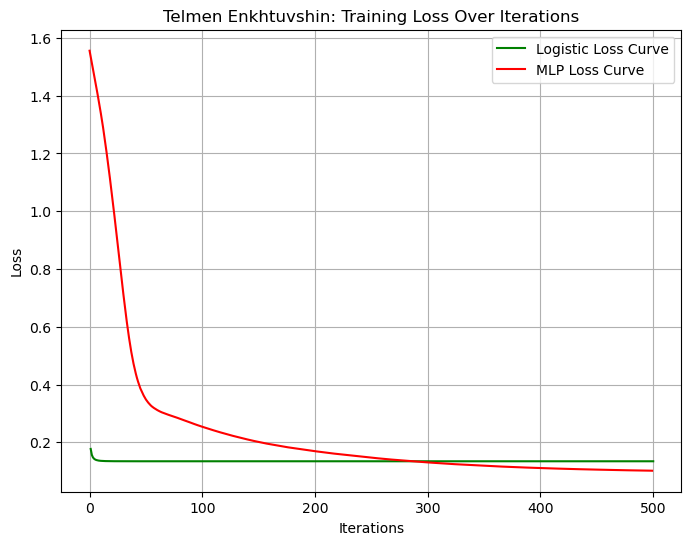

In [20]:
# Extract loss during MLP training
# Your code
mlp_model_loss_curve = mlp_model.loss_curve_
Logic_loss = loss_curve

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
# Your code
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(Logic_loss) + 1), Logic_loss, label="Logistic Loss Curve", color="green")
plt.plot(mlp_model_loss_curve, label="MLP Loss Curve", color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Telmen Enkhtuvshin: Training Loss Over Iterations")
plt.grid()
plt.legend()
plt.show()


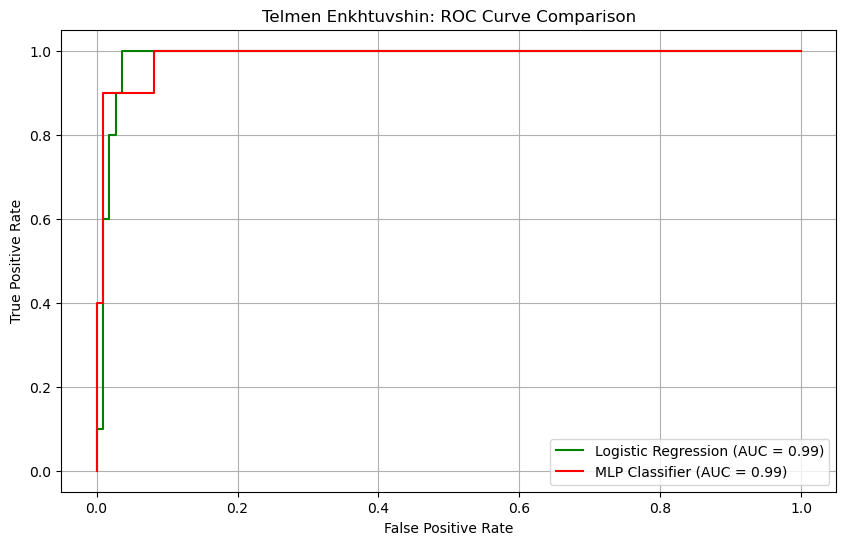

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Plot ROC Curve Comparison


# Plot ROC curves
# Your code 
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)
    
# please set color of Logistic as green, set MLP as red.
# Your code 
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f"Logistic Regression (AUC = {auc_val_logistic:.2f})", color="green")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP Classifier (AUC = {auc_val_mlp:.2f})", color="red")
plt.title("Telmen Enkhtuvshin: ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [22]:
# Your idea:
# I see that Logistic Regression and MLP Classifier has comparably similar AUC score.
# Thus, in this case with the ROC Curve graph, they are almost equally performant.
# But logistic regression only works well on good preprocessed datasets.
# Furthermore, MLP utilizes the neural network architecture, so it can achieve better results for more complex data.
# Lastly, I see that AUC_ROC curves helps us compare different models' classification performance with varying points.


## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

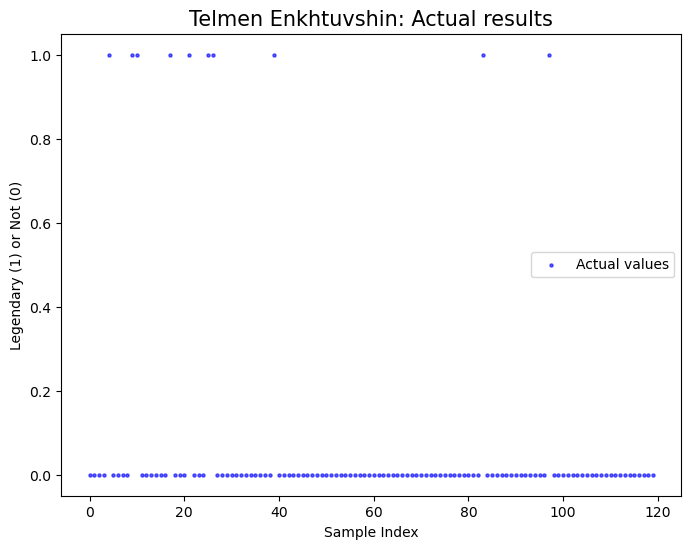

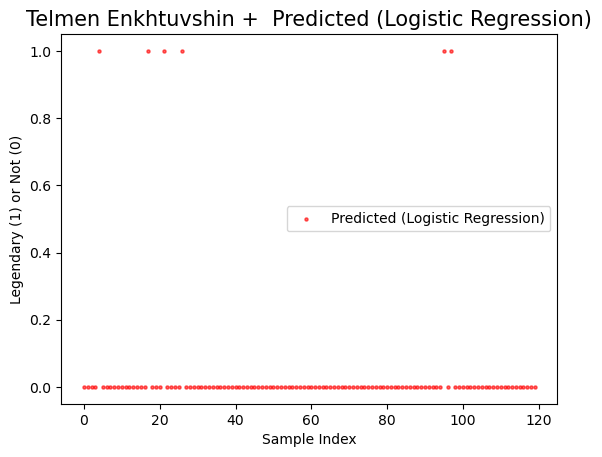

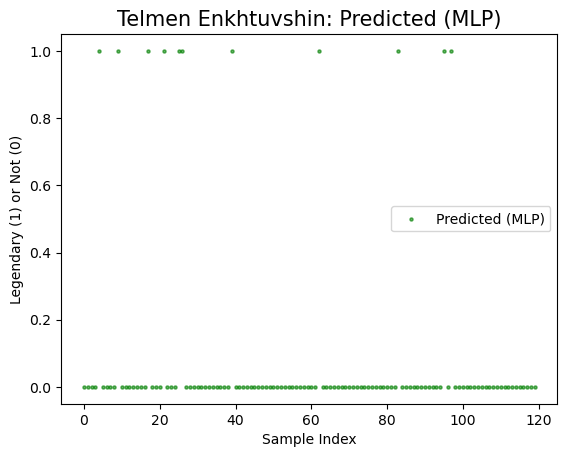

In [28]:
# Please plot the Actual data and Predicted for Logistic and MLP model
# Your code
# Actual Results
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_val)), y_val, color="blue", alpha=0.6, label="Actual values", s=5)
plt.title("Telmen Enkhtuvshin: Actual results", fontsize=15)
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

# Predicted Logistic Regression
plt.scatter(range(len(y_val)), y_val_pred_logistic, color='red', alpha=0.6, label="Predicted (Logistic Regression)", s=5)
plt.title("Telmen Enkhtuvshin +  Predicted (Logistic Regression)", fontsize=15)
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

# Predicted MLP
plt.scatter(range(len(y_val)), y_val_pred_mlp, color='green', alpha=0.6, label="Predicted (MLP)", s=5)
plt.title("Telmen Enkhtuvshin: Predicted (MLP)", fontsize=15)
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()

### Confusion Matrices

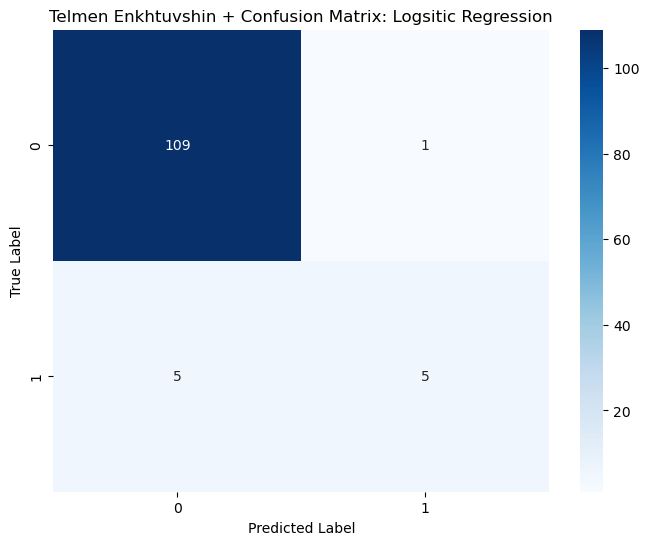

In [29]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression

# your code
cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")
plt.title("Telmen Enkhtuvshin + Confusion Matrix: Logsitic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

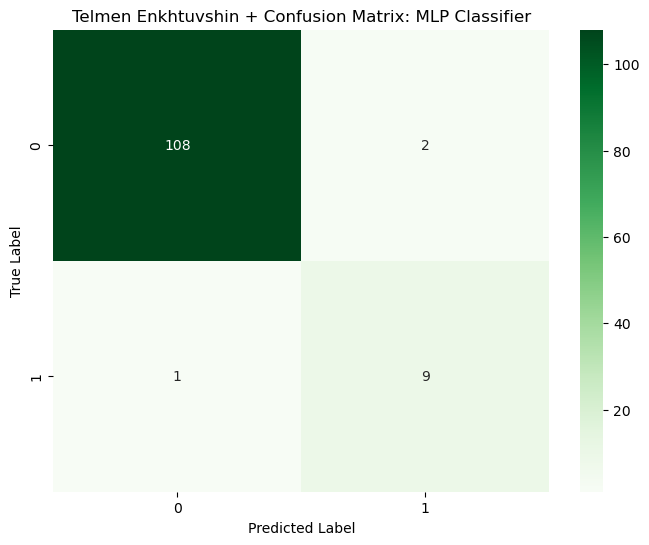

In [30]:
# plot MLP
# Your code
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("Telmen Enkhtuvshin + Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Conclusion

In [32]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea :
# The common results of the Logistic and MLP results are that they performed reasonably well and almost matches 
# each other in terms of results. The true positive and true negative rates are close to each other.
# But, the difference of these two would be in the exact values of correct and incorrect results.
# Specifically, Logistic Regression has total correct rate of 114 and MLP with 117.
# The false values or in other words, the incorrect values of Logistic is 6 and MLP's is 3.
# So, pure objecttively, the MLP Classifier performs slightly better than Logistic Regression.